In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Importing** **Dataset**

In [ ]:
df = pd.read_csv("/content/steel_strength.csv")
df.head()

,formula,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [ ]:
df.shape

(312, 18)

In [ ]:
column_to_drop = 'formula'
df = df.drop(column_to_drop, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fe                312 non-null    float64
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        303 non-null    float64
dt

In [ ]:
df.isna().sum()

Fe                  0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(303, 17)

<Axes: >

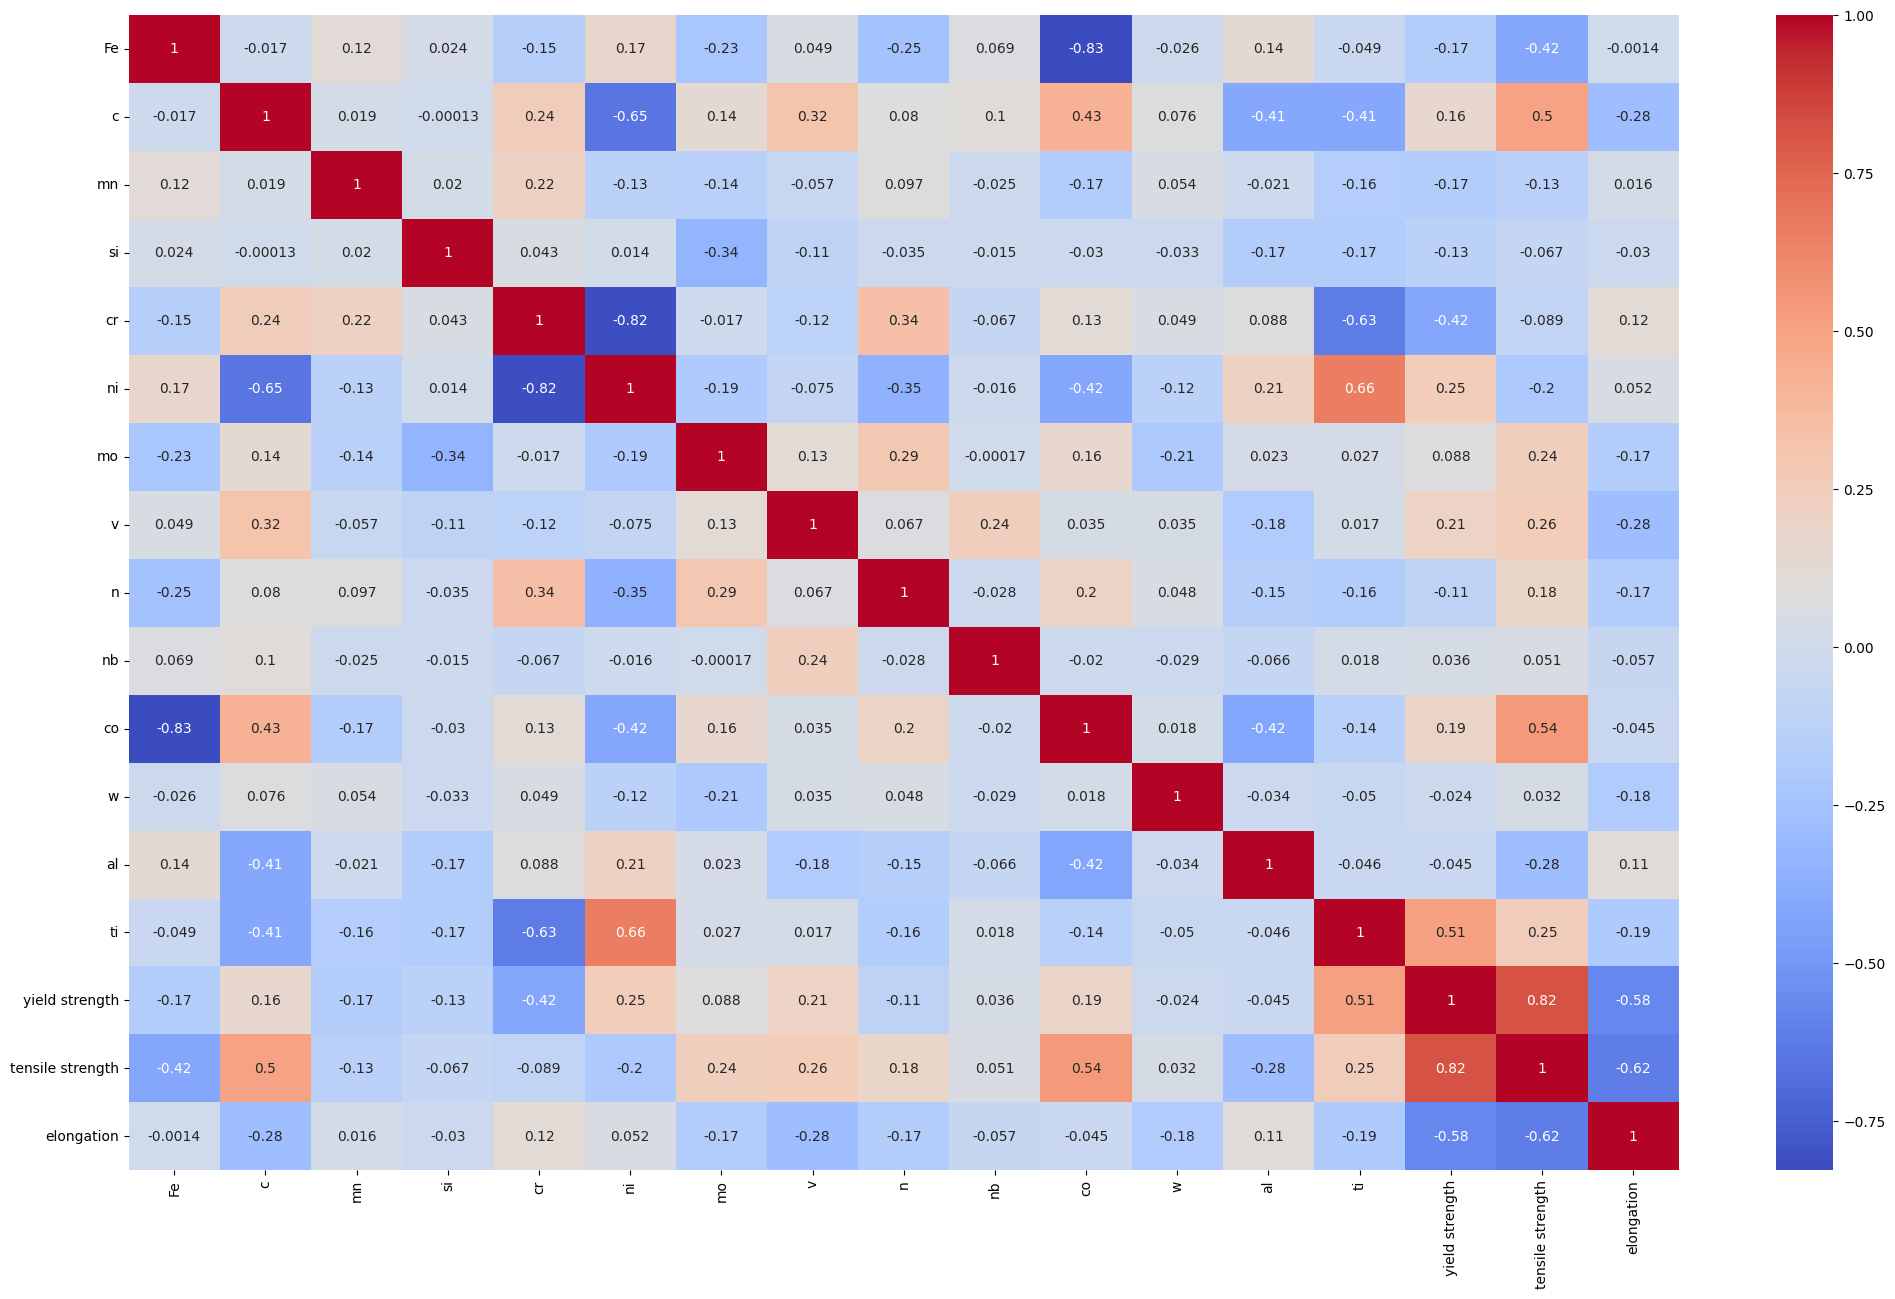

In [ ]:
correlation = df.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='coolwarm')

In [ ]:
X = df.iloc[:,0:14] #Feature Columns
y = df.iloc[:,14:]  #Target Columns

In [ ]:
X.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
3,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55
5,63.69,0.19,0.02,0.49,12.56,0.94,1.96,0.01,0.00,0.01,20.10,0.00,0.03,0.00


In [ ]:
y.head()

,yield strength,tensile strength,elongation
0,2411.5,2473.5,7.0
1,1123.1,1929.2,8.0
3,2487.3,2514.9,9.0
4,2249.6,2315.0,8.5
5,1328.3,1779.5,19.7


In [ ]:
sc = MinMaxScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X.columns);
y_scaled = pd.DataFrame(sc.fit_transform(Y),columns=Y.columns);

In [ ]:
X_scaled.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.000000,0.046512,0.013378,0.008439,0.000000,0.938066,0.303627,0.002315,0.000000,0.004,0.746142,0.000000,0.078212,0.620
1,0.018634,0.418605,0.000000,0.000000,0.767867,0.000000,0.309845,0.106481,0.266667,0.004,0.968143,0.255991,0.016760,0.000
2,0.043090,0.023256,0.013378,0.008439,0.000000,0.842782,0.407254,0.002315,0.000000,0.004,0.746142,0.000000,0.067039,0.588
3,0.074922,0.023256,0.013378,0.008439,0.000000,0.923773,0.148187,0.002315,0.000000,0.004,0.741165,0.000000,0.067039,0.620
4,0.123835,0.441860,0.003344,0.101266,0.717553,0.044307,0.201036,0.002315,0.000000,0.004,1.000000,0.000000,0.011173,0.000


In [ ]:
y_scaled.head()

,yield strength,tensile strength,elongation
0,0.934326,0.937782,0.151515
1,0.077905,0.586847,0.181818
2,0.984712,0.964475,0.212121
3,0.826708,0.835590,0.196970
4,0.214305,0.490329,0.536364


In [ ]:
from sklearn.model_selection import train_test_split

X_new,X_test,y_new,y_test = train_test_split(X_scaled,y_scaled,test_size=0.1,random_state=1);
X_train,X_valid,y_train,y_valid = train_test_split(X_new,y_new,test_size=0.2,random_state=1)

[X_train.shape,y_train.shape],[X_valid.shape,y_valid.shape],[X_test.shape,y_test.shape]

([(217, 14), (217, 3)], [(55, 14), (55, 3)], [(31, 14), (31, 3)])

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (217, 14) (217, 3)
Validation set shape: (55, 14) (55, 3)
Test set shape: (31, 14) (31, 3)


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=14, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(3, activation='linear'))

model.compile(loss=keras.losses.mse,
                 optimizer=keras.optimizers.Adam(),
                 metrics=["mse"])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 128, shuffle=True, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 9ms/step - loss: 0.2016 - mse: 0.2016
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0793 - mse: 0.0793
Epoch 3/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0686 - mse: 0.0686
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 0.0630 - mse: 0.0630
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 0.0491 - mse: 0.0491
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 0.0419 - mse: 0.0419
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 0.0326 - mse: 0.0326
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 0.0275 - mse: 0.0275
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 0.0276 - mse: 0.0276
Epoch 11/500
2/2 [==============================] - 0s 10ms/step - loss: 0.0

In [ ]:
y_pred = model.predict(X_valid)

2/2 [==============================] - 0s 8ms/step


In [ ]:
NN_res = {'R2 Score':	r2_score(y_valid, y_pred),'RMSE':mean_squared_error(y_valid, y_pred,squared = False), 'MAE':mean_absolute_error(y_valid, y_pred)}
NN_res

{'R2 Score': 0.6298775403789719,
 'RMSE': 0.09792195364707272,
 'MAE': 0.06915911544089338}

In [ ]:
NN_test_y_pred = model.predict(X_test)

1/1 [==============================] - 0s 26ms/step


In [ ]:
NN_Final_results = {'r2score':r2_score(y_test,NN_test_y_pred),'rmse':mean_squared_error(y_test,NN_test_y_pred,squared=False),'mae':mean_absolute_error(y_test,NN_test_y_pred)}
NN_Final_results

{'r2score': 0.46899194637381997,
 'rmse': 0.12757983215525528,
 'mae': 0.09121432572105063}